# Data analysis for MCMC calculations of energies
## Problem 1b) Brute Force sampling
### Fabian Faulstich and Yngve Mardal Moe

In [2]:
# Base python imports
import numpy as np
import matplotlib.pyplot as plt
import joblib
from time import time
from timeit import timeit

# VMC imports
from particles import Particles
from wave_function import WaveFunction
from sampler import MetropolisSampler, ImportanceSampler

In [4]:
# Supress divide by zero warnings
np.seterr(divide='ignore')

# IPython magics
%matplotlib inline
%load_ext autoreload
%autoreload 2

We start by defining a simple function that simulate the system according to the parameters given in problem 1b)

In [6]:
def create_sampler(num_particles, num_dimensions, alpha, step_size, seed=None):
    parts = Particles(
        num_particles=num_particles, 
        num_dimensions=num_dimensions,
        mass=1,
        diameter=0
    )
    wave_function = WaveFunction(
        particles=parts,
        alpha=alpha,
        beta=1,
        omega_ho=1,
        omega_z=1
    )
    sampler = MetropolisSampler(
        wave_function=wave_function,
        step_size=step_size,
        seed=seed
    )
    return sampler


def simulate_simple(num_particles, num_dimensions, alpha, step_size,
                    num_iterations, seed=None):
    sampler = create_sampler(
        num_particles=num_particles,
        num_dimensions=num_dimensions,
        alpha=alpha,
        step_size=step_size,
        seed=seed
    )
    return sampler.compute_local_energy(num_iterations)

We now find good step sizes for our samplers.

In [4]:
alphas = np.logspace(-2, np.log(.5)/np.log(10), 5, base=10)
num_particles = np.array([1, 10, 100, 500])
num_dimensions = np.array([1, 2, 3])
samplers = {}


In [5]:
for alpha in alphas:
    for n in num_particles:
        for d in num_dimensions:
            samplers[(alpha, n, d)] = create_sampler(n, d, alpha, 0.1)

In [6]:
acceptance_ratios = {}
for params, sampler in samplers.items():
    print(f'Params: {params}')
    print('-'*50)
    t0 = time()
    try:
        acceptance_ratios[params] = sampler.find_ideal_step_size(
            delta=0.01,
            num_iterations=1000,
            verbose=True
        )
    except RuntimeError:
        print('Failed to find ideal step size, we try again with a larger'
              'number of iterations.')
        print('-'*50)
        acceptance_ratios[params] = sampler.find_ideal_step_size(
            delta=0.01,
            num_iterations=2000,
            verbose=True
        )
    print(f'Took {time()-t0:3f} seconds')
    print('='*50)

for params, ratios in acceptance_ratios.items():
    print(f'{params}: step_size: {ratios[0]:03f}, acceptance_ratio: {ratios[1]:03f}')

Params: (0.01, 1, 1)
--------------------------------------------------


/home/yngve/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yngve/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found left bound, 0.1
  With ar 0.992
Found right bound, 25.6
  With ar 0.42

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
    Iteration number 3 completed
    Iteration number 4 completed
    Iteration number 5 completed
    Iteration number 6 completed
Found acceptable step size after 6 iterations
Took 2.648250 seconds
Params: (0.01, 1, 2)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.99
Found right bound, 12.8
  With ar 0.451

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
    Iteration number 3 completed
    Iteration number 4 completed
    Iteration number 5 completed
    Iteration number 6 completed
Found acceptable step size after 6 iterations
Took 2.513530 seconds
Params: (0.01, 1, 3)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.992
Found right bound, 12.8
  With ar 0.333

Starting iterations now
    Iteration num

Found left bound, 0.1
  With ar 0.988
Found right bound, 6.4
  With ar 0.432

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
    Iteration number 3 completed
    Iteration number 4 completed
    Iteration number 5 completed
Found acceptable step size after 5 iterations
Took 2.390488 seconds
Params: (0.026591479484724942, 100, 1)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.998
Found right bound, 25.6
  With ar 0.293

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
    Iteration number 3 completed
    Iteration number 4 completed
    Iteration number 5 completed
    Iteration number 6 completed
Found acceptable step size after 6 iterations
Took 5.360528 seconds
Params: (0.026591479484724942, 100, 2)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.993
Found right bound, 12.8
  With ar 0.283

Starting iterations now
    Iteration

    Iteration number 1 completed
    Iteration number 2 completed
    Iteration number 3 completed
    Iteration number 4 completed
    Iteration number 5 completed
    Iteration number 6 completed
    Iteration number 7 completed
    Iteration number 8 completed
    Iteration number 9 completed
    Iteration number 10 completed
Found acceptable step size after 10 iterations
Took 107.180114 seconds
Params: (0.070710678118654752, 500, 3)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.989
Found right bound, 6.4
  With ar 0.212

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
Found acceptable step size after 2 iterations
Took 95.678705 seconds
Params: (0.18803015465431966, 1, 1)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.949
Found right bound, 6.4
  With ar 0.412

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
    Iteration nu

    Iteration number 3 completed
    Iteration number 4 completed
    Iteration number 5 completed
    Iteration number 6 completed
    Iteration number 7 completed
Found acceptable step size after 7 iterations
Took 1.758980 seconds
Params: (0.50000000000000011, 10, 1)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.923
Found right bound, 3.2
  With ar 0.428

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
    Iteration number 3 completed
    Iteration number 4 completed
Found acceptable step size after 4 iterations
Took 2.024227 seconds
Params: (0.50000000000000011, 10, 2)
--------------------------------------------------
Found left bound, 0.1
  With ar 0.94
Found right bound, 3.2
  With ar 0.226

Starting iterations now
    Iteration number 1 completed
    Iteration number 2 completed
Found acceptable step size after 2 iterations
Took 1.685388 seconds
Params: (0.50000000000000011, 10, 3)
-----------------

-------
With step sizes found, we compute the energies and compare them to the true energies.

The local energy of a harmonic oscillator (which the non-interacting case is) is given by
$$nd\alpha + ||\vec{r}||^2\left[\frac{1}{2} - 2 \alpha^2\right],$$
where $n$ is the number of particles and $d$ is the number of dimensions of the system.

We then compute the expected value $\mathbb{E}[E_L]$ using $\hbar = m = \omega_{ho} = \omega_\ = 1$ and get
$$\mathbb{E}[E_L] = \frac{nd}{4\alpha}$$

Let us now check if these match the simulated parameters.

Before we do that, we "warm up" the samplers so that the particles have reasonable initial conditions and time this to get an estimate of how long time the MCMC iterations will take.

In [7]:
acceptance_ratios = {}
for param, sampler in samplers.items():
    acceptance_ratios[param] = sampler.compute_acceptance_ratio(1000)

In [8]:
energies = {}
variances = {}
for param, sampler in samplers.items():
    e, v = sampler.compute_local_energy(100000)
    energies[param] = e
    variances[param] = v

In [9]:
def expected_energy(parameters):
    return np.prod(parameters)/2 + parameters[1]*parameters[2]/(parameters[0]*8)

acceptance_ratios = {param: sampler.acceptance_ratio for param, sampler in samplers.items()}

print('| Alpha |  n  | d | Computed energy | True energy |   Error   |   Variances  | Acceptance rate |')
print('|-------|-----|---|-----------------|-------------|-----------|--------------|-----------------|')
for param, energy in energies.items():
    print(f'|{param[0]:6.3f} |{param[1]:4d} | {param[2]} |{energy:16.4f} |{expected_energy(param):12.3f} |{energy - expected_energy(param):10.3f} | {variances[param]:12.1f} |  {acceptance_ratios[param]:14.4f} |')


| Alpha |  n  | d | Computed energy | True energy |   Error   |   Variances  | Acceptance rate |
|-------|-----|---|-----------------|-------------|-----------|--------------|-----------------|
| 0.010 |   1 | 1 |         12.3648 |      12.505 |    -0.140 |        309.3 |          0.5242 |
| 0.010 |   1 | 2 |         24.7918 |      25.010 |    -0.218 |        606.3 |          0.4951 |
| 0.010 |   1 | 3 |         37.9112 |      37.515 |     0.396 |        964.2 |          0.4974 |
| 0.010 |  10 | 1 |        125.9259 |     125.050 |     0.876 |       3164.5 |          0.5098 |
| 0.010 |  10 | 2 |        254.8958 |     250.100 |     4.796 |       6400.5 |          0.4986 |
| 0.010 |  10 | 3 |        379.1321 |     375.150 |     3.982 |       9833.5 |          0.5026 |
| 0.010 | 100 | 1 |       1234.9931 |    1250.500 |   -15.507 |      32591.4 |          0.4845 |
| 0.010 | 100 | 2 |       2515.3552 |    2501.000 |    14.355 |      57543.9 |          0.5095 |
| 0.010 | 100 | 3 |       3758

This table comes from copying the above output

| Alpha |  n  | d | Computed energy | True energy |   Error   |   Variances  | Acceptance rate |
|-------|-----|---|-----------------|-------------|-----------|--------------|-----------------|
| 0.010 |   1 | 1 |         10.7179 |      12.505 |    -1.787 |        257.4 |          0.5560 |
| 0.010 |   1 | 2 |         30.1124 |      25.010 |     5.102 |        809.9 |          0.4420 |
| 0.010 |   1 | 3 |         38.5204 |      37.515 |     1.005 |       1102.5 |          0.4620 |
| 0.010 |  10 | 1 |        107.4186 |     125.050 |   -17.631 |       2119.9 |          0.4930 |
| 0.010 |  10 | 2 |        249.2657 |     250.100 |    -0.834 |       6068.3 |          0.5000 |
| 0.010 |  10 | 3 |        356.2448 |     375.150 |   -18.905 |       9462.0 |          0.4810 |
| 0.010 | 100 | 1 |       1348.9226 |    1250.500 |    98.423 |      29055.3 |          0.5110 |
| 0.010 | 100 | 2 |       2438.9174 |    2501.000 |   -62.083 |      32815.7 |          0.4790 |
| 0.010 | 100 | 3 |       3595.3988 |    3751.500 |  -156.101 |      38503.1 |          0.4850 |
| 0.010 | 500 | 1 |       6931.3930 |    6252.500 |   678.893 |      16629.8 |          0.4410 |
| 0.010 | 500 | 2 |      12177.9507 |   12505.000 |  -327.049 |      43302.7 |          0.5220 |
| 0.010 | 500 | 3 |      18201.3230 |   18757.500 |  -556.177 |      11943.8 |          0.5000 |
| 0.027 |   1 | 1 |          5.2057 |       4.714 |     0.492 |         50.5 |          0.5170 |
| 0.027 |   1 | 2 |          9.8821 |       9.428 |     0.454 |         74.7 |          0.5040 |
| 0.027 |   1 | 3 |         14.7177 |      14.142 |     0.576 |        148.0 |          0.4970 |
| 0.027 |  10 | 1 |         49.8665 |      47.140 |     2.726 |        364.2 |          0.4690 |
| 0.027 |  10 | 2 |         97.9319 |      94.281 |     3.651 |        733.3 |          0.4960 |
| 0.027 |  10 | 3 |        151.8202 |     141.421 |    10.399 |        948.0 |          0.5210 |
| 0.027 | 100 | 1 |        486.1273 |     471.405 |    14.722 |       4917.5 |          0.4910 |
| 0.027 | 100 | 2 |       1066.1692 |     942.810 |   123.359 |       2943.8 |          0.5120 |
| 0.027 | 100 | 3 |       1521.0250 |    1414.215 |   106.810 |       2687.6 |          0.5330 |
| 0.027 | 500 | 1 |       2291.2823 |    2357.025 |   -65.743 |       2170.9 |          0.5000 |
| 0.027 | 500 | 2 |       4596.9453 |    4714.050 |  -117.104 |       6043.3 |          0.4840 |
| 0.027 | 500 | 3 |       7057.1005 |    7071.074 |   -13.974 |       1821.0 |          0.5280 |
| 0.071 |   1 | 1 |          1.5448 |       1.803 |    -0.258 |          4.0 |          0.4900 |
| 0.071 |   1 | 2 |          3.4373 |       3.606 |    -0.169 |         11.6 |          0.4790 |
| 0.071 |   1 | 3 |          5.1690 |       5.409 |    -0.240 |         18.3 |          0.4750 |
| 0.071 |  10 | 1 |         18.4745 |      18.031 |     0.443 |         46.2 |          0.4730 |
| 0.071 |  10 | 2 |         35.8319 |      36.062 |    -0.231 |        142.1 |          0.4770 |
| 0.071 |  10 | 3 |         60.2147 |      54.094 |     6.121 |        193.8 |          0.4970 |
| 0.071 | 100 | 1 |        179.5629 |     180.312 |    -0.749 |        686.5 |          0.5050 |
| 0.071 | 100 | 2 |        373.8863 |     360.624 |    13.262 |        269.4 |          0.5330 |
| 0.071 | 100 | 3 |        582.4806 |     540.937 |    41.544 |       1683.3 |          0.4920 |
| 0.071 | 500 | 1 |        905.9230 |     901.561 |     4.362 |        678.2 |          0.5030 |
| 0.071 | 500 | 2 |       1782.2005 |    1803.122 |   -20.922 |        337.6 |          0.4870 |
| 0.071 | 500 | 3 |       2616.8181 |    2704.683 |   -87.865 |        367.9 |          0.4970 |
| 0.188 |   1 | 1 |          0.6919 |       0.759 |    -0.067 |          0.4 |          0.4870 |
| 0.188 |   1 | 2 |          1.3510 |       1.518 |    -0.167 |          0.8 |          0.4830 |
| 0.188 |   1 | 3 |          2.1633 |       2.276 |    -0.113 |          1.3 |          0.5070 |
| 0.188 |  10 | 1 |          7.4135 |       7.588 |    -0.174 |          6.2 |          0.4890 |
| 0.188 |  10 | 2 |         15.2408 |      15.176 |     0.065 |         11.7 |          0.4810 |
| 0.188 |  10 | 3 |         23.8034 |      22.764 |     1.039 |         18.6 |          0.5320 |
| 0.188 | 100 | 1 |         83.6019 |      75.880 |     7.722 |         68.4 |          0.4520 |
| 0.188 | 100 | 2 |        148.5429 |     151.760 |    -3.218 |         87.6 |          0.5260 |
| 0.188 | 100 | 3 |        218.5124 |     227.641 |    -9.128 |         38.5 |          0.4790 |
| 0.188 | 500 | 1 |        389.9148 |     379.401 |    10.514 |         58.3 |          0.4880 |
| 0.188 | 500 | 2 |        734.9102 |     758.802 |   -23.892 |         23.7 |          0.4950 |
| 0.188 | 500 | 3 |       1179.4378 |    1138.203 |    41.235 |         54.4 |          0.5030 |
| 0.500 |   1 | 1 |          0.5000 |       0.500 |     0.000 |          0.0 |          0.5130 |
| 0.500 |   1 | 2 |          1.0000 |       1.000 |     0.000 |          0.0 |          0.4590 |
| 0.500 |   1 | 3 |          1.5000 |       1.500 |     0.000 |          0.0 |          0.4940 |
| 0.500 |  10 | 1 |          5.0000 |       5.000 |     0.000 |          0.0 |          0.4840 |
| 0.500 |  10 | 2 |         10.0000 |      10.000 |     0.000 |          0.0 |          0.5270 |
| 0.500 |  10 | 3 |         15.0000 |      15.000 |     0.000 |          0.0 |          0.4980 |
| 0.500 | 100 | 1 |         50.0000 |      50.000 |     0.000 |          0.0 |          0.5190 |
| 0.500 | 100 | 2 |        100.0000 |     100.000 |     0.000 |          0.0 |          0.5080 |
| 0.500 | 100 | 3 |        150.0000 |     150.000 |     0.000 |          0.0 |          0.5210 |
| 0.500 | 500 | 1 |        250.0000 |     250.000 |     0.000 |          0.0 |          0.5170 |
| 0.500 | 500 | 2 |        500.0000 |     500.000 |     0.000 |          0.0 |          0.4900 |
| 0.500 | 500 | 3 |        750.0000 |     750.000 |     0.000 |          0.0 |          0.5050 |

Thus, we see that our MCMC sampler does indeed seem to give the correct result for the non-interacting case.

----------------------
## Timings
Let us now see what the complexity of the MCMC sampler is. Here, $m$ denote the number of iterations, $n$ the number of particles and $d$ the number of dimensions.

We choose alpha equal to 0.5 for these tests.

The computational complexity scales linearly with the number of iterations, $m$, as each iteration does the exact same thing. We therefore only need to test the computational complexity wrt $n$ and $d$.

In [7]:
alpha = 0.5
num_particles = np.logspace(0, 2, 10, dtype=int)
num_dimensions = np.array([1, 2, 3])
speed_samplers = {}

for n in num_particles:
    for d in num_dimensions:
        speed_samplers[(n, d)] = create_sampler(n, d, alpha, 0.1)

In [11]:
for sampler in speed_samplers.values():
    sampler.find_ideal_step_size(delta=0.01, ideal=0.5, num_iterations=500)
    print(sampler)

In [12]:
timings = {}
num_it = 100
for params, sampler in speed_samplers.items():
    print(params)
    timings[params] = timeit(lambda : sampler.compute_local_energy(num_it),
                             number=100)
    

(1, 1)
(1, 2)
(1, 3)
(2, 1)
(2, 2)
(2, 3)
(4, 1)
(4, 2)
(4, 3)
(7, 1)
(7, 2)
(7, 3)
(12, 1)
(12, 2)
(12, 3)
(21, 1)
(21, 2)
(21, 3)
(35, 1)
(35, 2)
(35, 3)
(59, 1)
(59, 2)
(59, 3)
(100, 1)
(100, 2)
(100, 3)


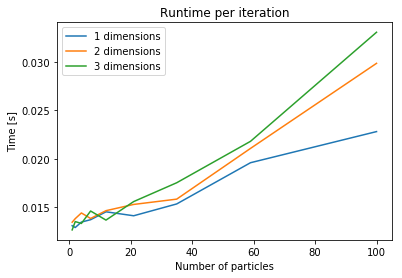

In [13]:
plt.figure()
for d in num_dimensions:
    runtime = [timings[(n, d)]/num_it for n in num_particles]
    plt.plot(num_particles, runtime)

plt.legend([f'{d} dimensions' for d in num_dimensions])
plt.title('Runtime per iteration')
plt.xlabel('Number of particles')
plt.ylabel('Time [s]')
plt.show()

This seem like it might be squared complexity. Let us therefore perform a square root transform.

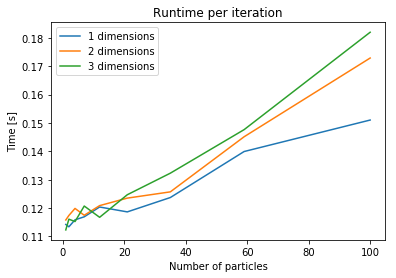

In [14]:
plt.figure()
for d in num_dimensions:
    runtime = np.array([timings[(n, d)]/num_it for n in num_particles])
    plt.plot(num_particles, np.sqrt(runtime))
    plt.title('Root runtime as a function of number of particles')

plt.legend([f'{d} dimensions' for d in num_dimensions])
plt.title('Runtime per iteration')
plt.xlabel('Number of particles')
plt.ylabel('Time [s]')
plt.show()

From this plot, it seems like there is a quadratic complexity with respect to the number of parameters (in the non-interacting case that is. In the interacting case there is a tripple loop which is skipped if the Boson diameter is 0).